# Funciones de distribución  de probabilidades

## Distribución uniforme

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100151., 100248.,  99781.,  99993., 100260.,  99444.,  99882.,
        100143.,  99688., 100410.]),
 array([ 1.00009352, 10.90007623, 20.80005895, 30.70004166, 40.60002438,
        50.50000709, 60.3999898 , 70.29997252, 80.19995523, 90.09993795,
        99.99992066]),
 <a list of 10 Patch objects>)

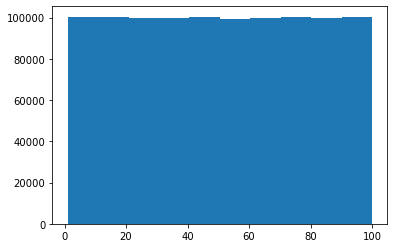

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(100)

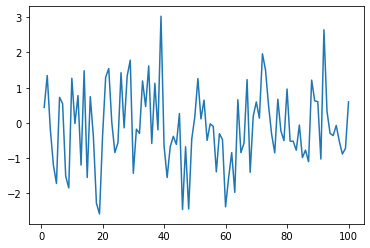

In [5]:
x = range(1,101)
plt.plot(x, data)

(array([ 5.,  7.,  8., 26., 19., 16.,  9.,  7.,  1.,  2.]),
 array([-2.58104147, -2.02026376, -1.45948605, -0.89870835, -0.33793064,
         0.22284707,  0.78362477,  1.34440248,  1.90518019,  2.46595789,
         3.0267356 ]),
 <a list of 10 Patch objects>)

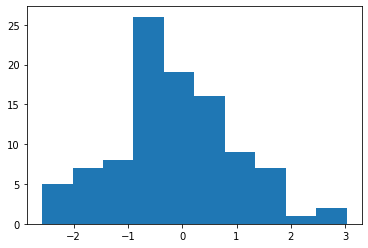

In [6]:
plt.hist(data)

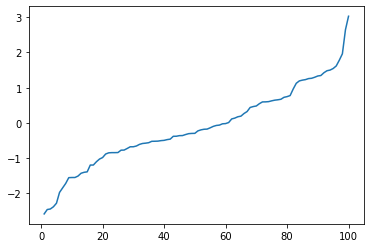

In [7]:
plt.plot(x,sorted(data))

(array([   8.,   95.,  501., 1559., 2751., 2883., 1607.,  502.,   85.,
           9.]),
 array([-4.27753332, -2.32881603, -0.38009873,  1.56861856,  3.51733586,
         5.46605315,  7.41477045,  9.36348774, 11.31220504, 13.26092234,
        15.20963963]),
 <a list of 10 Patch objects>)

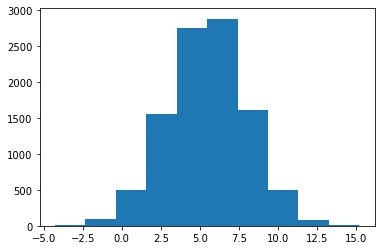

In [8]:
mu = 5.5
sd = 2.5
data = mu + sd*np.random.randn(10000) # z = (X-mu)/sd ->N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 1.18839635, -1.09354499,  0.66664787,  1.4565572 ],
       [-0.58588526,  0.56337654,  1.74207185,  1.45480108]])

## La simulación de Monte Carlo

*Generamos dos números aleatorios uniforme x a y entre 0 y 1.
*Calcularemos x*x + y*y.
    *Si el valor es inferior a 1 -> estamos dentro del círculo.
    *Si el valor es superior a 1 -> estamos fuera del cículo.
*Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación e la probabilidad de caer dentro del círculo.
*Usamos dicha probabilidad para aproximar el valor de pi.
*Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de pi.
*Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de pi.

In [22]:
def pi_montecarlo(n,n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0 
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg/n_exp
    print(pi)
    plt.plot(pi_value_list)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

3.143082


(3.143082, [<matplotlib.lines.Line2D at 0x22e2a74bfd0>])

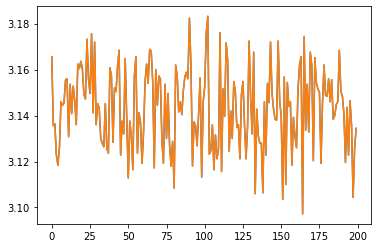

In [23]:
pi_montecarlo(10000,200)

## Dummy Data Sets

In [27]:
n = 100000
data = pd.DataFrame({
    'A' : np.random.randn(n),
    'B' : 1.5 + 2.5  * np.random.randn(n),
    'C' : np.random.uniform(5, 32, n)
}    
)

In [28]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,-0.002608,1.501560,18.522539
std,1.005098,2.486608,7.796327
min,-4.465090,-9.770366,5.000351
25%,-0.677818,-0.181122,11.787265
50%,-0.008624,1.503943,18.522989
75%,0.673731,3.171292,25.303422
max,4.409386,11.339338,31.999794


(array([1.7000e+01, 3.8600e+02, 3.2120e+03, 1.4471e+04, 3.1164e+04,
        3.1219e+04, 1.5384e+04, 3.7020e+03, 4.2100e+02, 2.4000e+01]),
 array([-4.46508961, -3.57764201, -2.69019442, -1.80274682, -0.91529922,
        -0.02785162,  0.85959598,  1.74704357,  2.63449117,  3.52193877,
         4.40938637]),
 <a list of 10 Patch objects>)

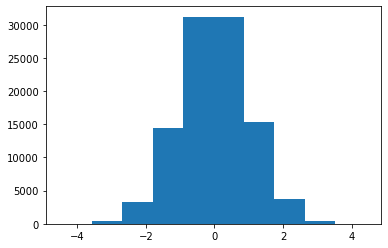

In [29]:
plt.hist(data['A'])

(array([1.3000e+01, 2.4600e+02, 2.0450e+03, 1.0442e+04, 2.5946e+04,
        3.2649e+04, 2.0710e+04, 6.7570e+03, 1.1000e+03, 9.2000e+01]),
 array([-9.77036562, -7.65939523, -5.54842484, -3.43745446, -1.32648407,
         0.78448632,  2.89545671,  5.00642709,  7.11739748,  9.22836787,
        11.33933826]),
 <a list of 10 Patch objects>)

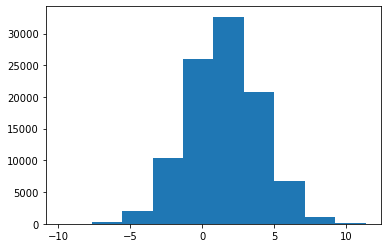

In [31]:
plt.hist(data['B'])

(array([ 9949.,  9945.,  9927., 10297.,  9805.,  9956.,  9841., 10139.,
        10071., 10070.]),
 array([ 5.00035105,  7.70029539, 10.40023973, 13.10018408, 15.80012842,
        18.50007277, 21.20001711, 23.89996145, 26.5999058 , 29.29985014,
        31.99979448]),
 <a list of 10 Patch objects>)

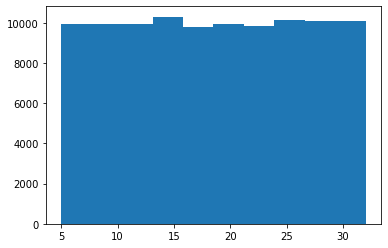

In [32]:
plt.hist(data['C'])

In [33]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [34]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [35]:
columns_names  = data.columns.values.tolist()

In [37]:
a = len(columns_names)

In [38]:
a

21

In [48]:
new_data = pd.DataFrame(
    {
        'Column Name' : columns_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }
)

In [49]:
new_data

,Column Name,A,B
0,State,0.561158,0.046748
1,Account Length,-1.198274,0.829697
2,Area Code,2.592236,0.068884
3,Phone,1.752990,0.619208
4,Int'l Plan,-0.202520,0.209320
5,VMail Plan,1.251397,0.097792
6,VMail Message,-1.372858,0.111752
7,Day Mins,0.669311,0.264452
8,Day Calls,0.126221,0.972602
9,Day Charge,0.797817,0.857440
